In [77]:
import tensorflow as tf

# Load MNIST data
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the images
train_images = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255

# Create a dataset for each digit
datasets = []
for digit in range(10):
    idx = train_labels == digit
    digit_images = train_images[idx]
    datasets.append(tf.data.Dataset.from_tensor_slices(digit_images).shuffle(1000).batch(60))


In [78]:
class GMMN(tf.keras.Model):
    def __init__(self):
        super(GMMN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(256, activation='relu')
        self.dense3 = tf.keras.layers.Dense(512, activation='relu')
        self.dense4 = tf.keras.layers.Dense(784, activation='sigmoid')  # MNIST images are 28x28=784 pixels

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)


In [79]:
def compute_kernel(x, y, sigma_list):
    """Computes a Gaussian kernel between two sets of samples using multiple bandwidth parameters."""
    beta_list = [1.0 / (2.0 * sigma**2) for sigma in sigma_list]
    x_size = tf.shape(x)[0]
    y_size = tf.shape(y)[0]
    dim = tf.cast(tf.shape(x)[1], tf.float32)
    x_expanded = tf.expand_dims(x, 1)
    y_expanded = tf.expand_dims(y, 0)
    kernel_val = 0.
    for beta in beta_list:
        beta = tf.cast(beta, tf.float32)
        squared_diff = tf.reduce_sum(tf.square(x_expanded - y_expanded), 2)
        kernel_val += tf.exp(-beta * squared_diff)
    return kernel_val / tf.cast(tf.size(sigma_list), tf.float32)

def compute_mmd(x, y, sigma_list=[2, 5, 10, 20, 40, 80]):
    """Computes the Maximum Mean Discrepancy (MMD) between two sets of samples, x and y."""
    x_kernel = compute_kernel(x, x, sigma_list)
    y_kernel = compute_kernel(y, y, sigma_list)
    xy_kernel = compute_kernel(x, y, sigma_list)
    return tf.reduce_mean(x_kernel) + tf.reduce_mean(y_kernel) - 2 * tf.reduce_mean(xy_kernel)


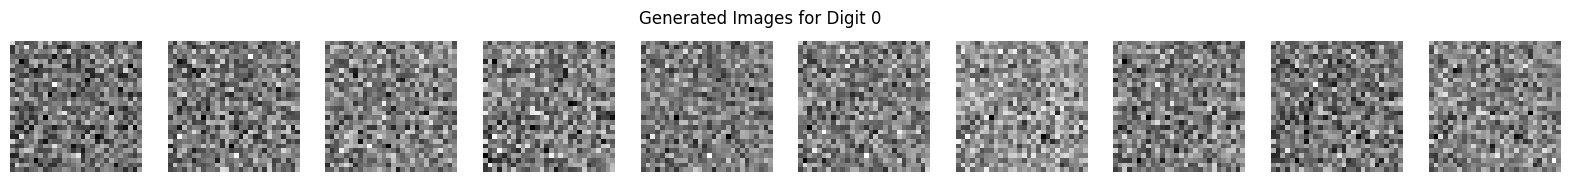

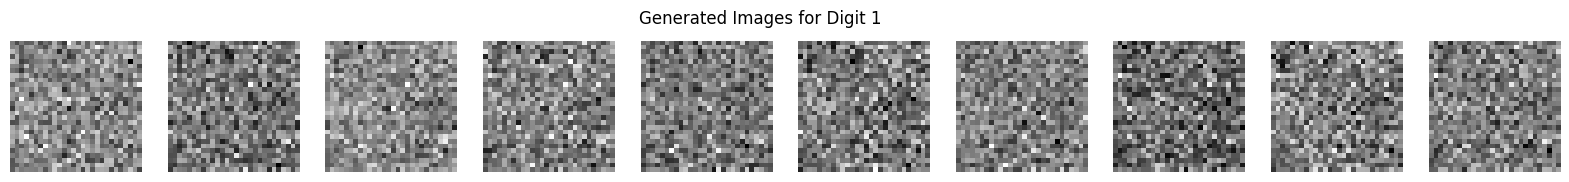

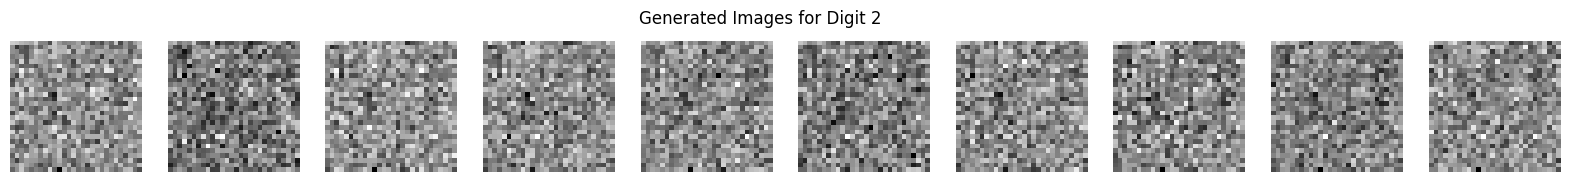

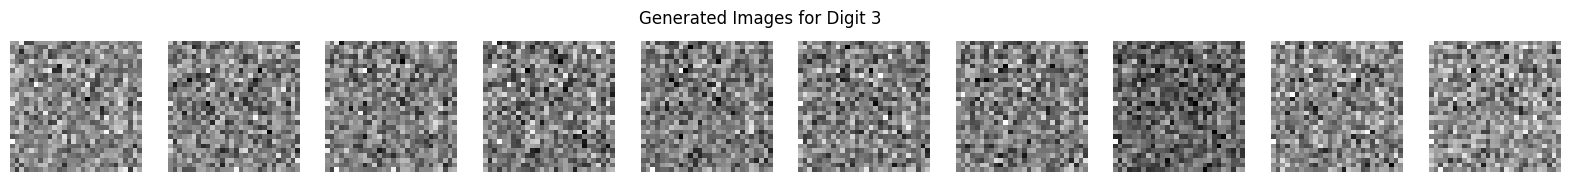

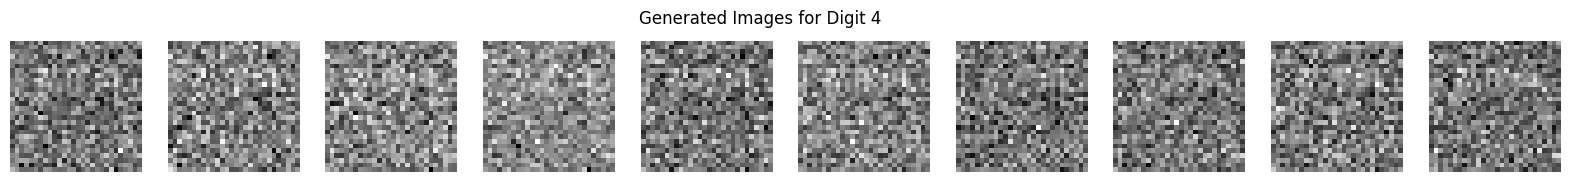

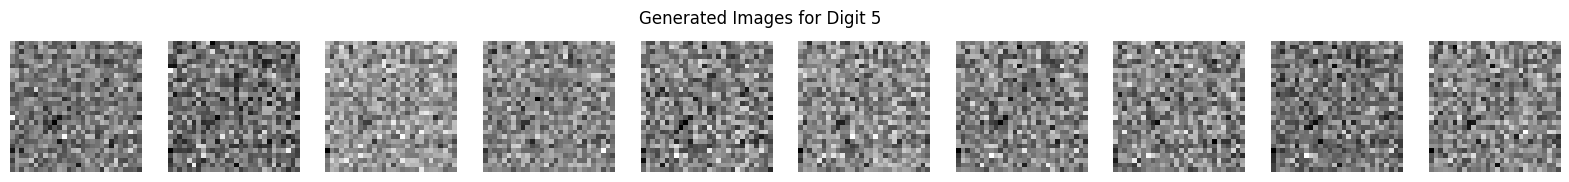

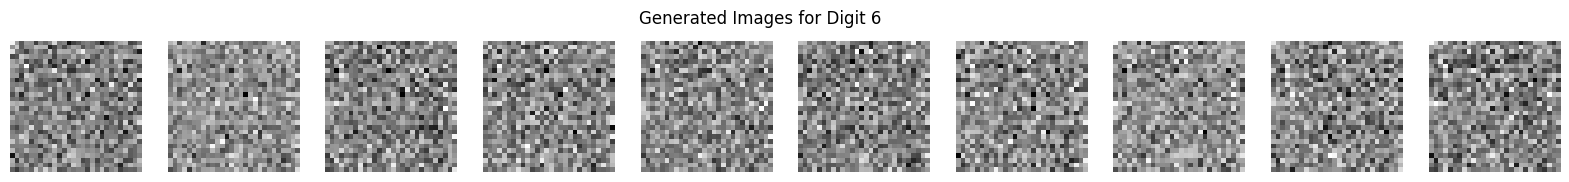

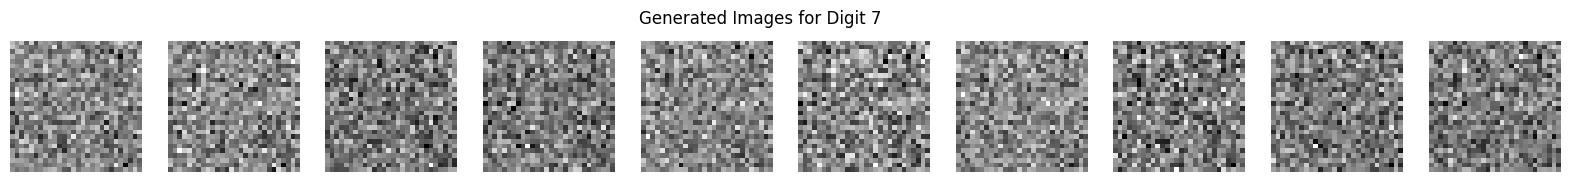

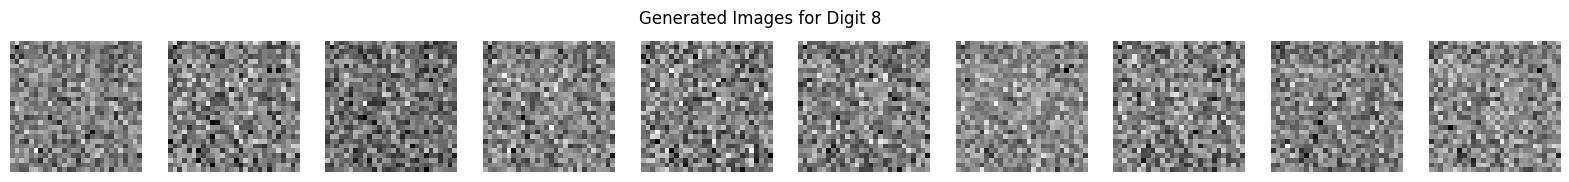

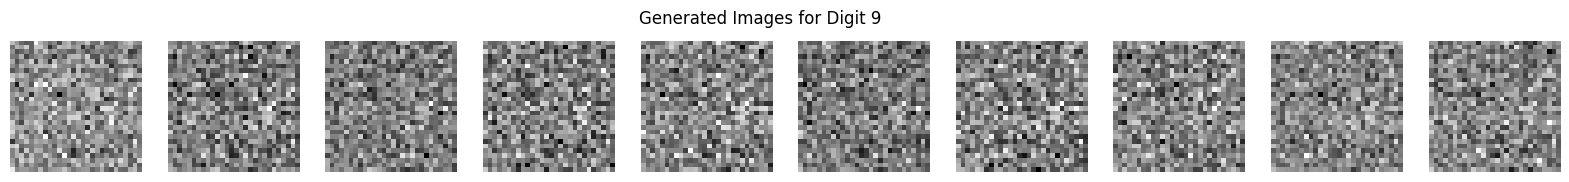

In [82]:
import matplotlib.pyplot as plt

models = [GMMN() for _ in range(10)]

def generate_images(model, digit, num_images=10):
    noise = tf.random.normal([num_images, 100])
    generated_images = model(noise)
    generated_images = tf.reshape(generated_images, (-1, 28, 28))

    fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(generated_images[i, :, :], cmap='gray')
        ax.axis('off')
    plt.suptitle(f'Generated Images for Digit {digit}')
    plt.show()


Training model for digit 2
Epoch 1, MMD Loss: 0.058643460273742676


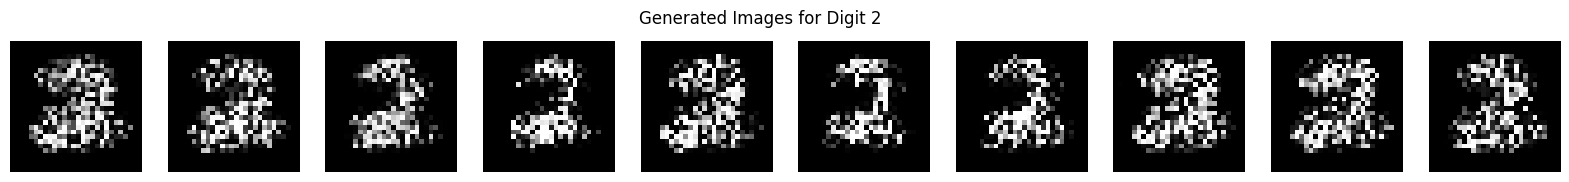

Epoch 2, MMD Loss: 0.04957115650177002


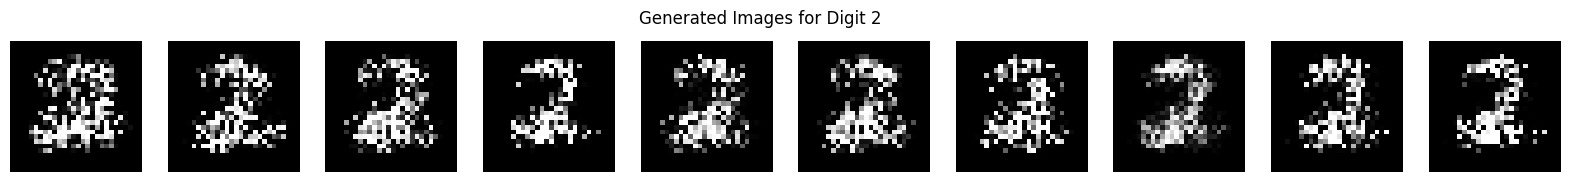

Epoch 3, MMD Loss: 0.05166900157928467


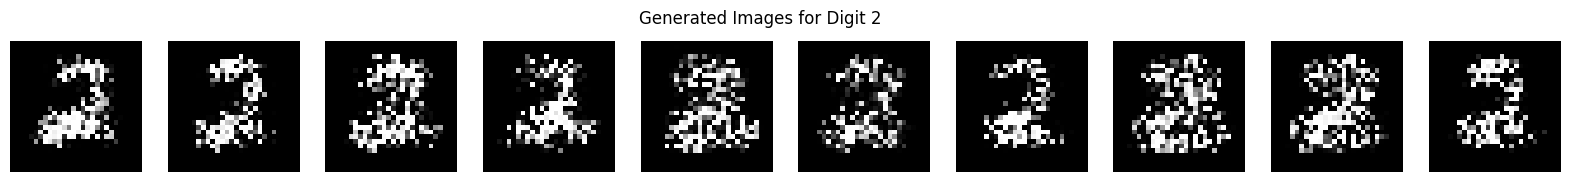

Epoch 4, MMD Loss: 0.052288055419921875


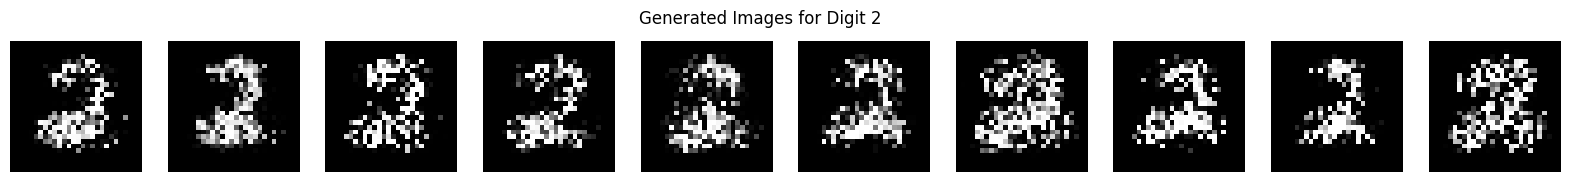

Epoch 5, MMD Loss: 0.056249141693115234


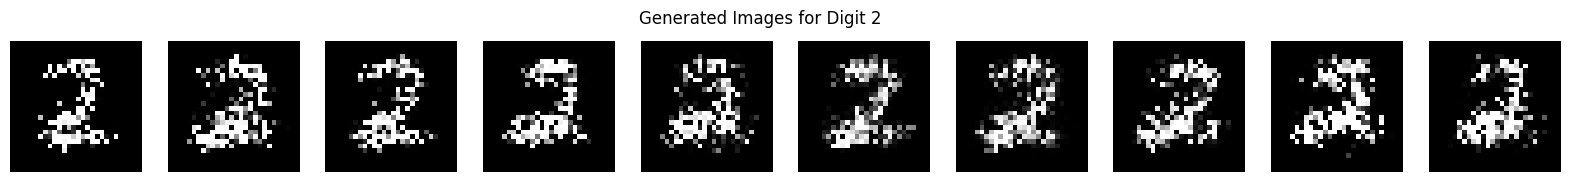

Epoch 6, MMD Loss: 0.04757404327392578


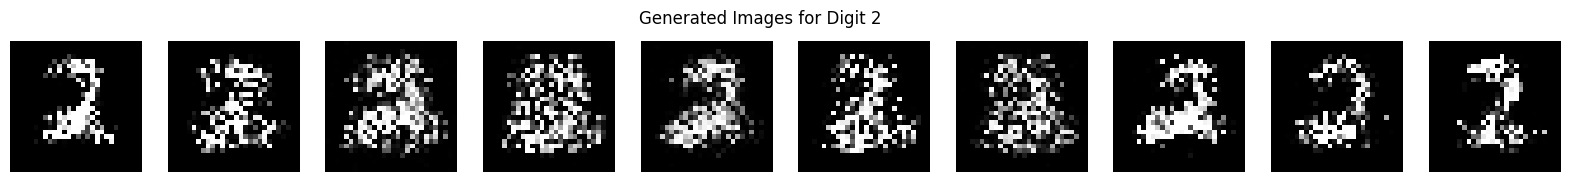

Epoch 7, MMD Loss: 0.054529666900634766


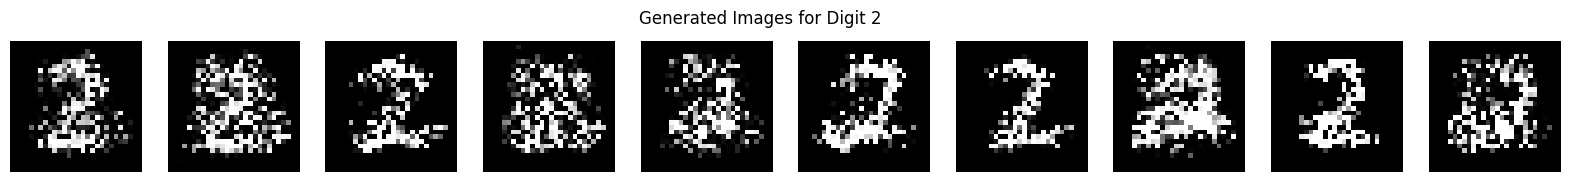

Epoch 8, MMD Loss: 0.05146169662475586


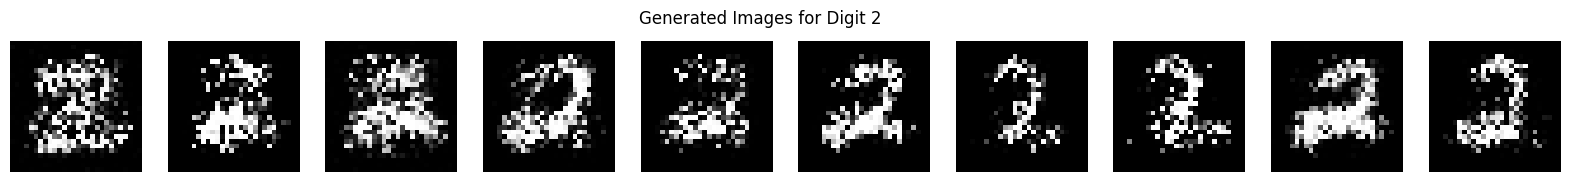

Epoch 9, MMD Loss: 0.05081629753112793


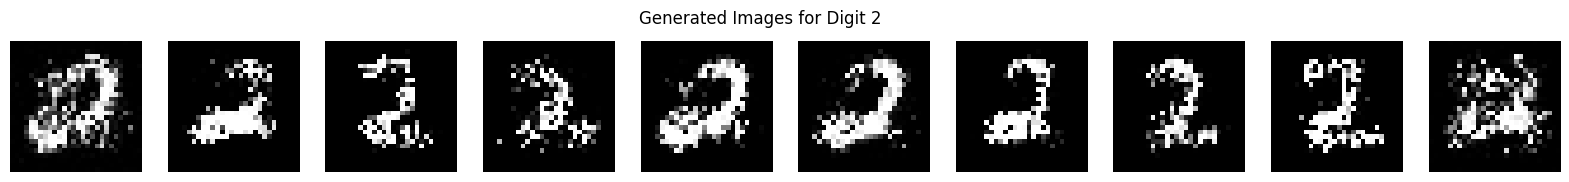

Epoch 10, MMD Loss: 0.050272345542907715


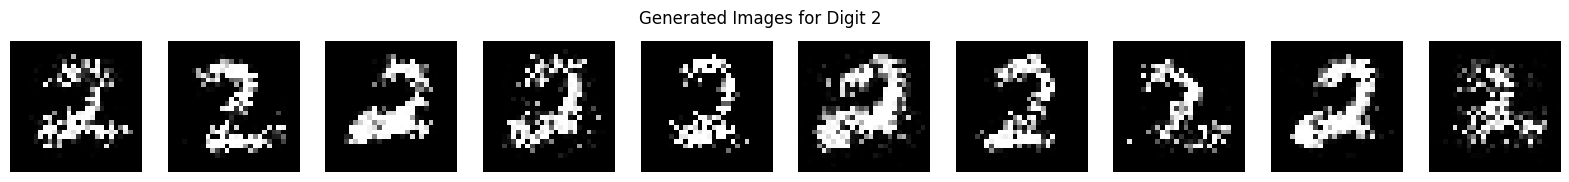

Training model for digit 3
Epoch 1, MMD Loss: 0.0817270278930664


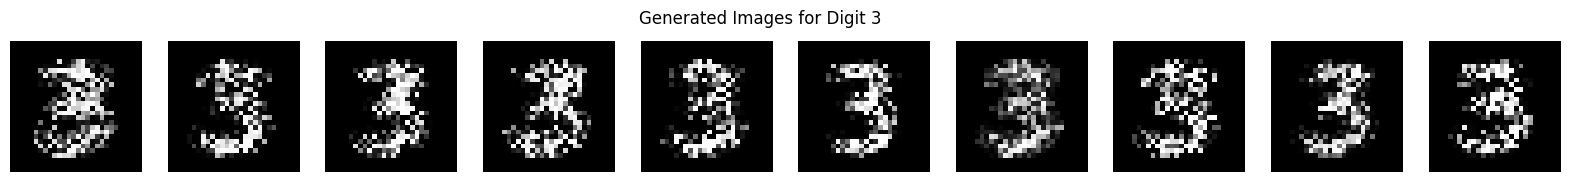

Epoch 2, MMD Loss: 0.07632791996002197


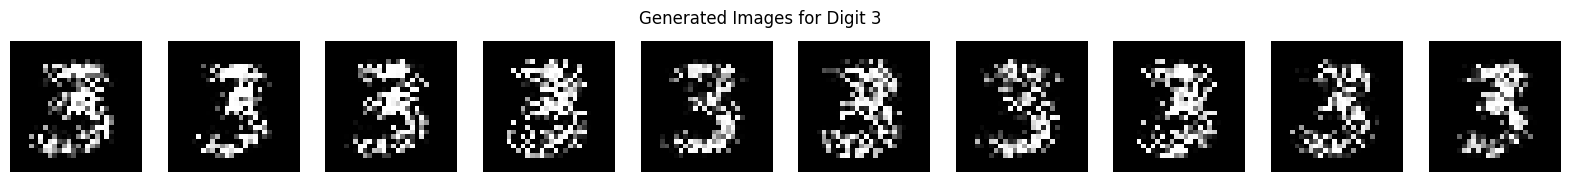

Epoch 3, MMD Loss: 0.07537591457366943


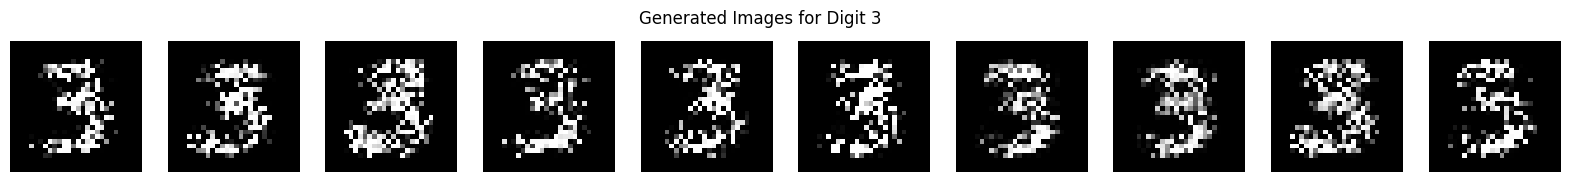

Epoch 4, MMD Loss: 0.08292984962463379


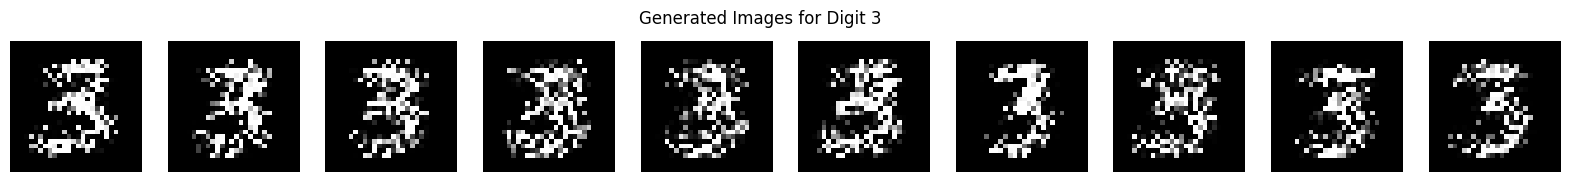

Epoch 5, MMD Loss: 0.06936335563659668


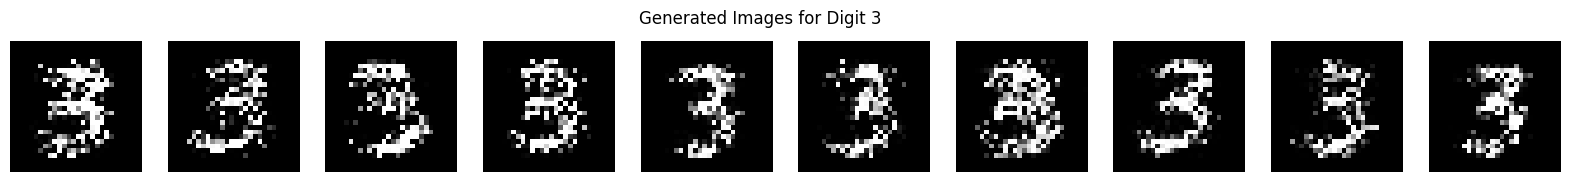

Epoch 6, MMD Loss: 0.07369911670684814


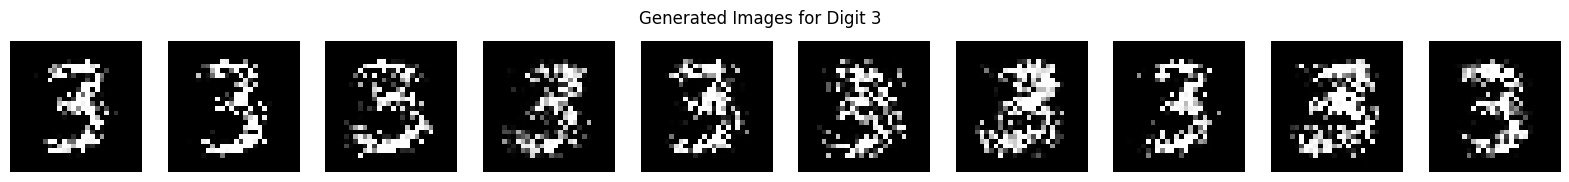

Epoch 7, MMD Loss: 0.0628671646118164


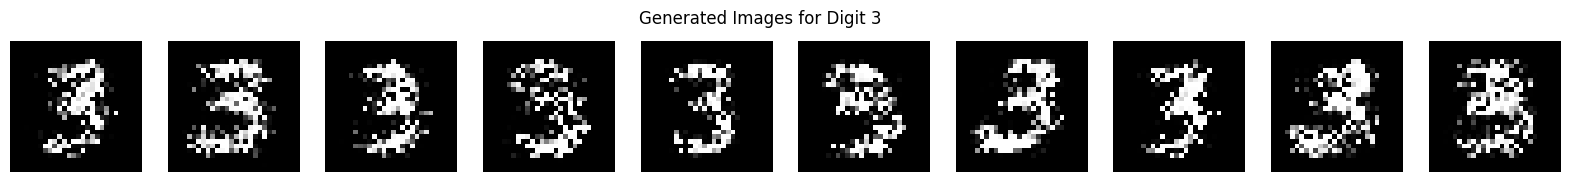

Epoch 8, MMD Loss: 0.06755721569061279


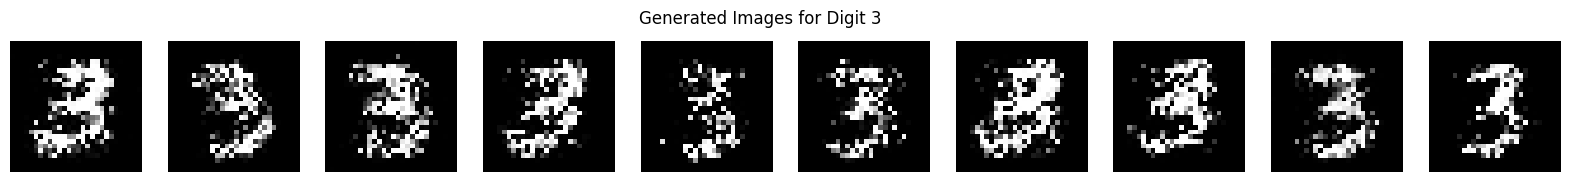

Epoch 9, MMD Loss: 0.06590187549591064


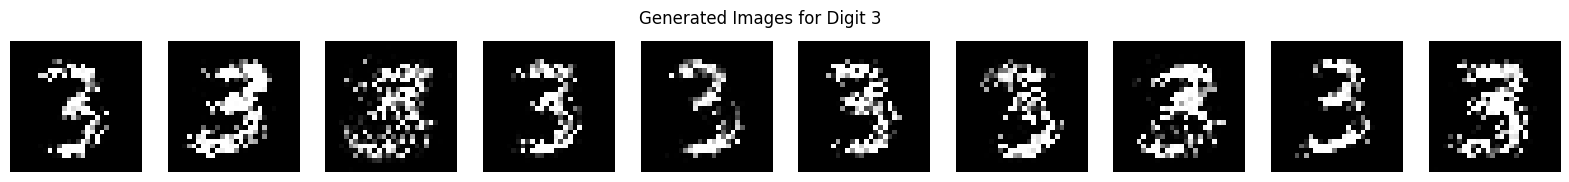

Epoch 10, MMD Loss: 0.07309424877166748


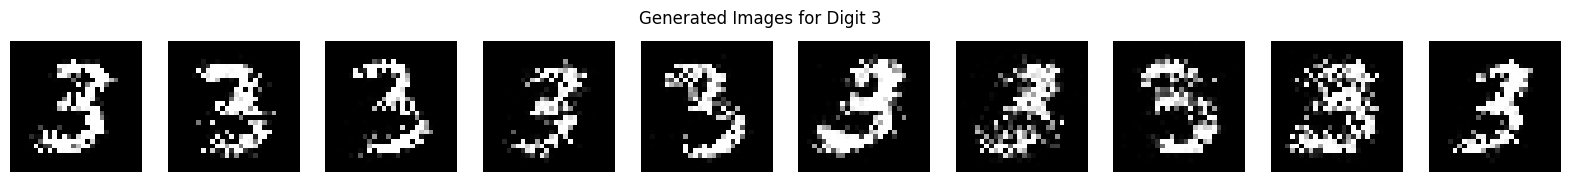

Training model for digit 4
Epoch 1, MMD Loss: 0.044535279273986816


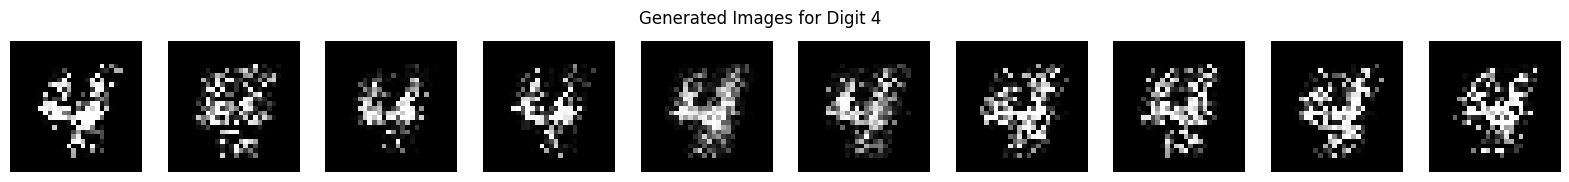

Epoch 2, MMD Loss: 0.040065646171569824


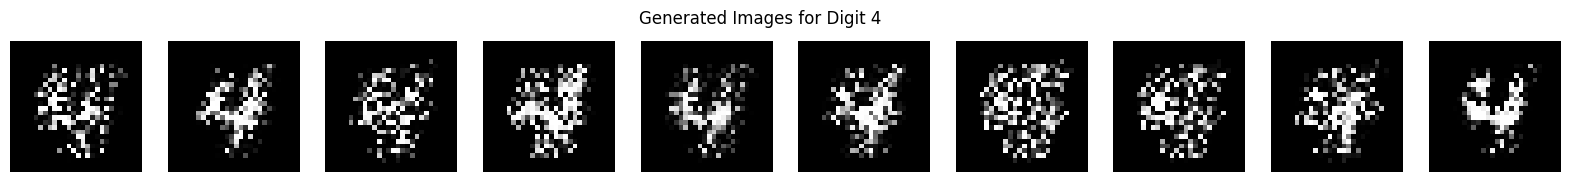

Epoch 3, MMD Loss: 0.04101967811584473


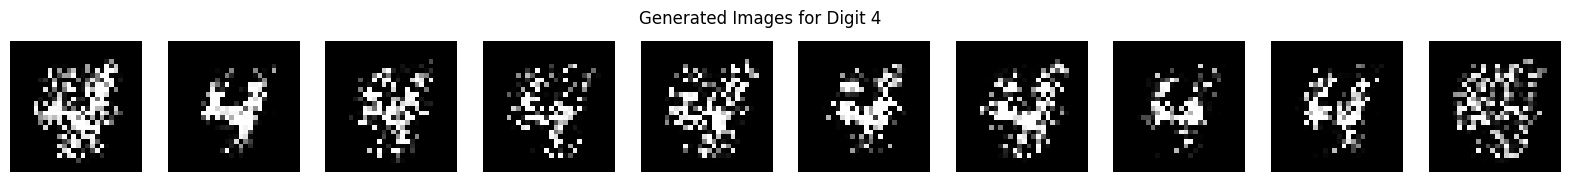

Epoch 4, MMD Loss: 0.03802204132080078


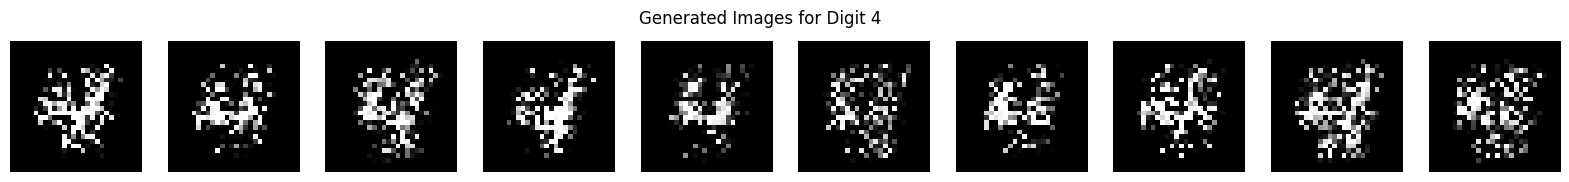

Epoch 5, MMD Loss: 0.04032397270202637


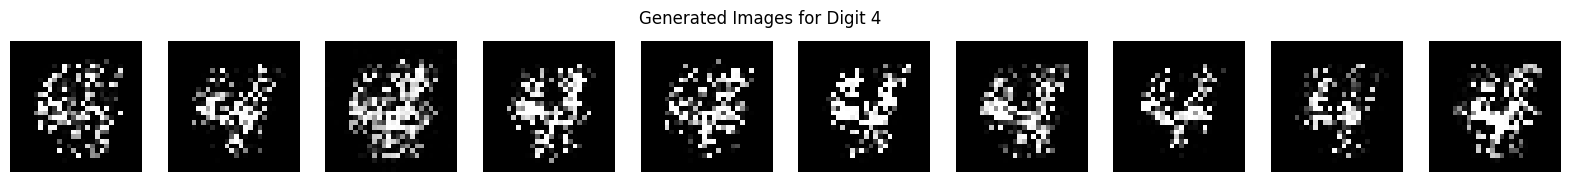

Epoch 6, MMD Loss: 0.03906130790710449


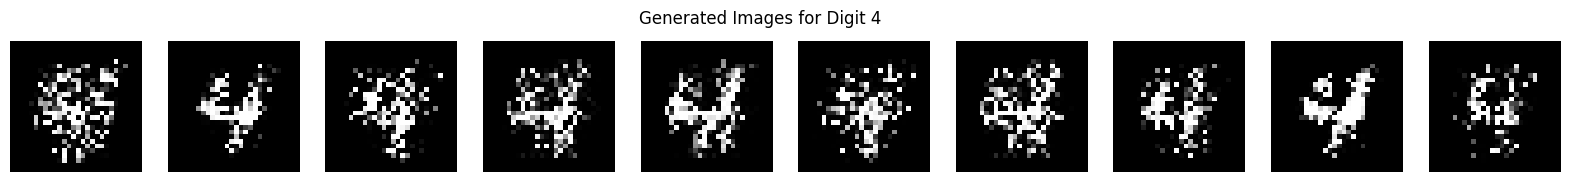

Epoch 7, MMD Loss: 0.03577613830566406


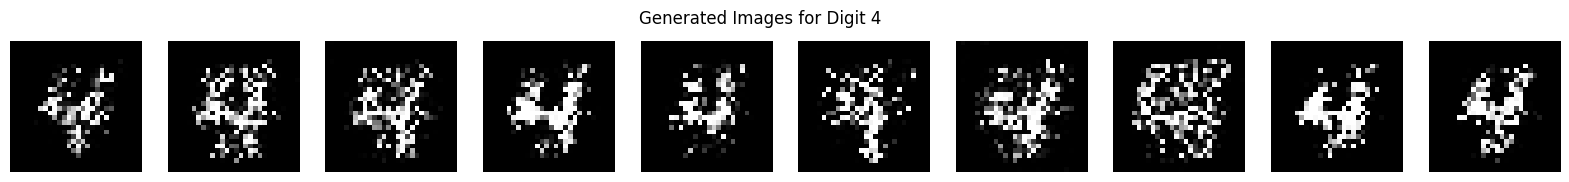

Epoch 8, MMD Loss: 0.034397006034851074


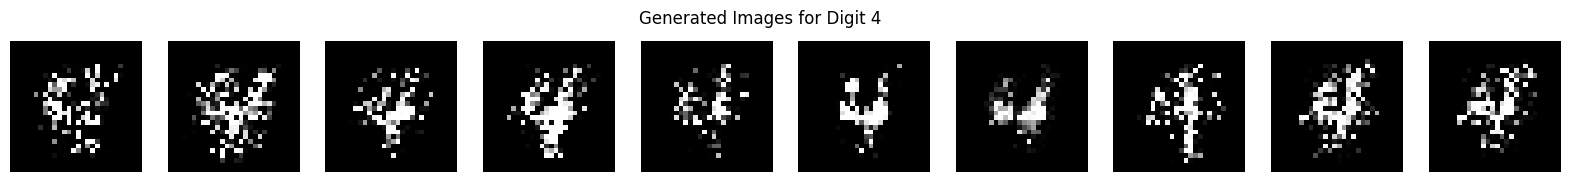

Epoch 9, MMD Loss: 0.0421290397644043


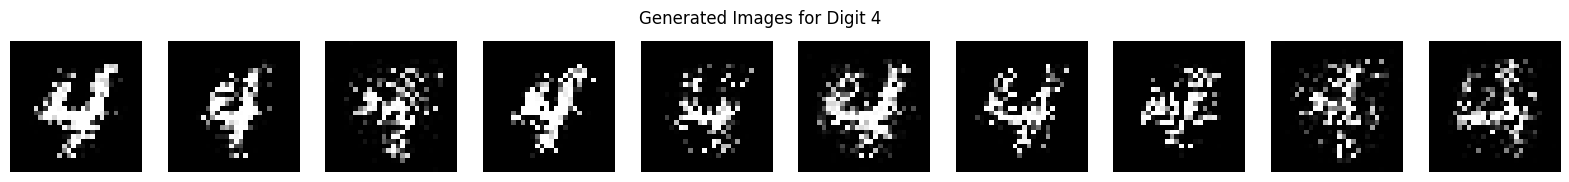

Epoch 10, MMD Loss: 0.04053092002868652


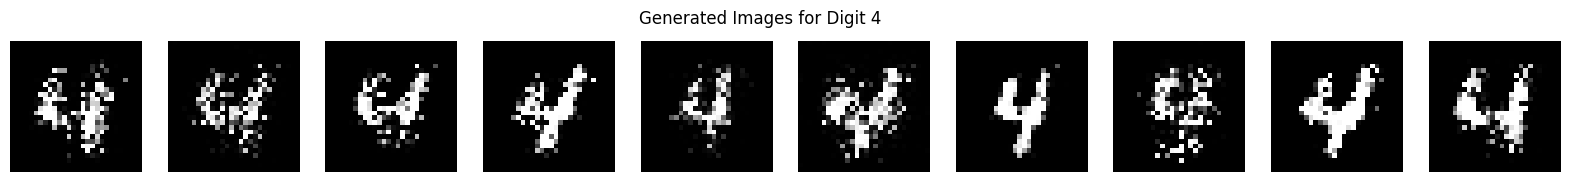

Training model for digit 5
Epoch 1, MMD Loss: 0.04589700698852539


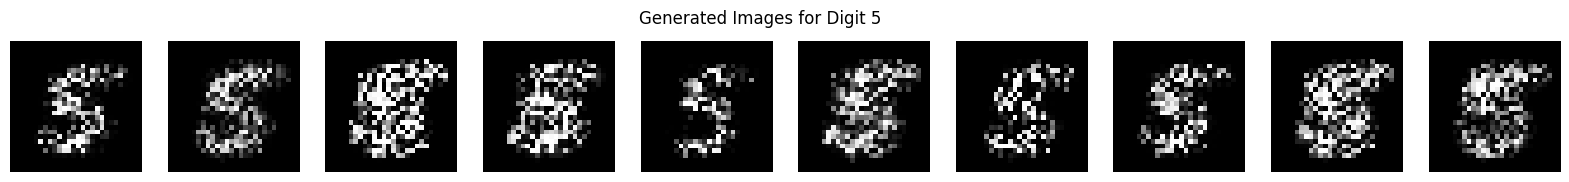

Epoch 2, MMD Loss: 0.04372978210449219


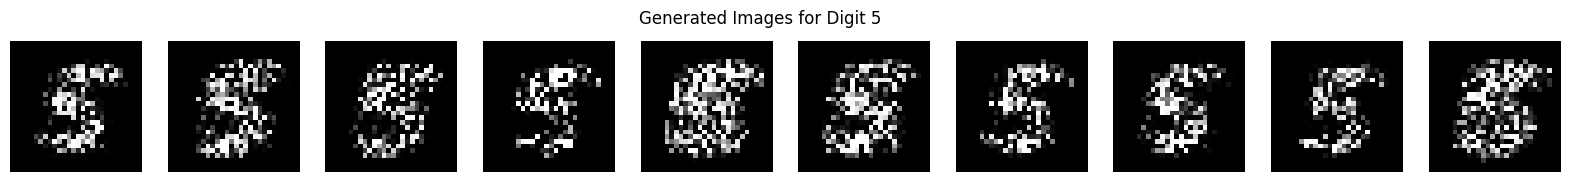

Epoch 3, MMD Loss: 0.05214250087738037


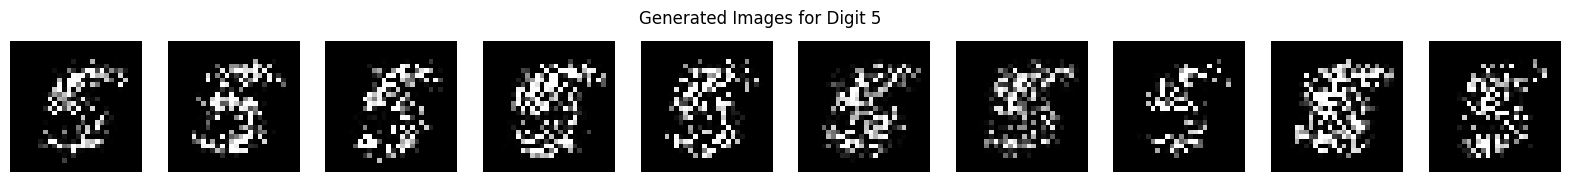

Epoch 4, MMD Loss: 0.04096996784210205


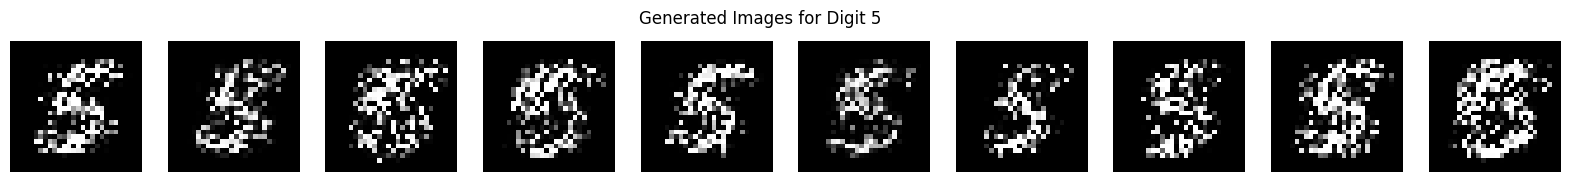

Epoch 5, MMD Loss: 0.04127705097198486


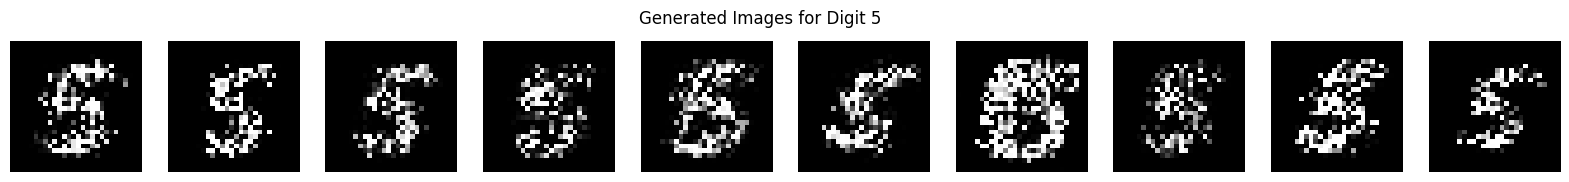

Epoch 6, MMD Loss: 0.058073997497558594


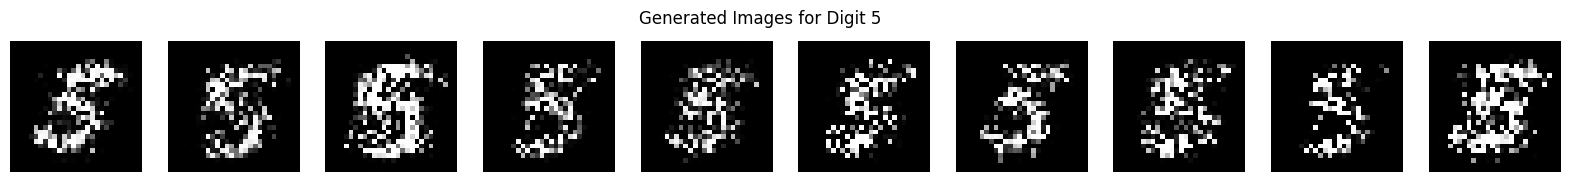

Epoch 7, MMD Loss: 0.0411534309387207


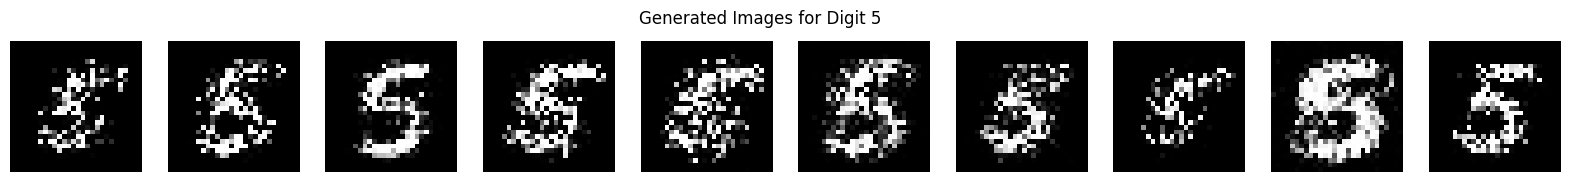

Epoch 8, MMD Loss: 0.04573369026184082


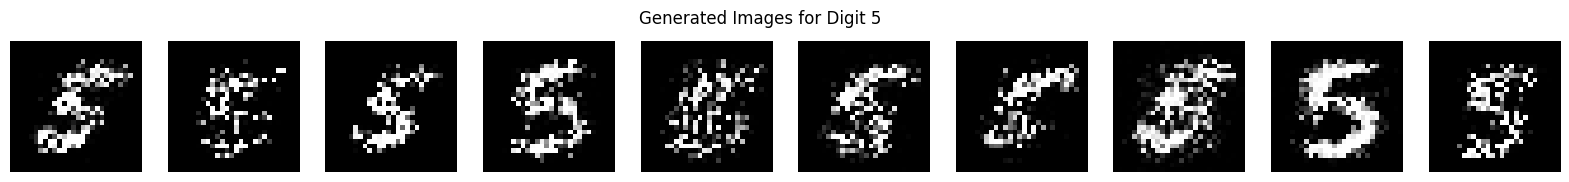

Epoch 9, MMD Loss: 0.04808521270751953


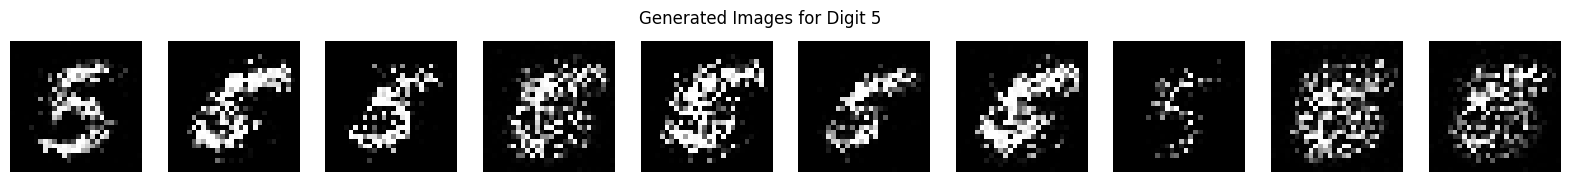

Epoch 10, MMD Loss: 0.04108691215515137


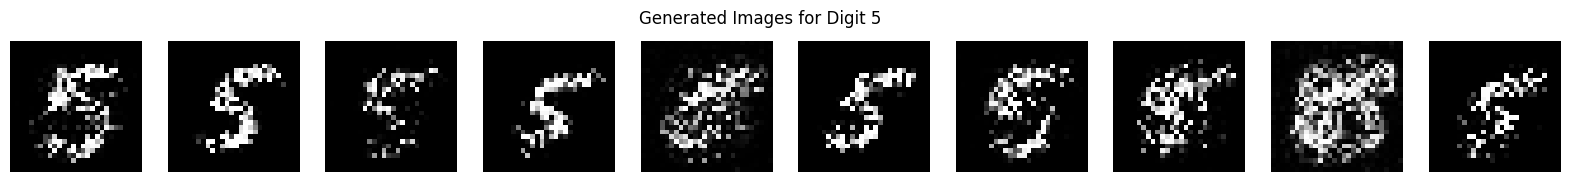

Training model for digit 6
Epoch 1, MMD Loss: 0.03392970561981201


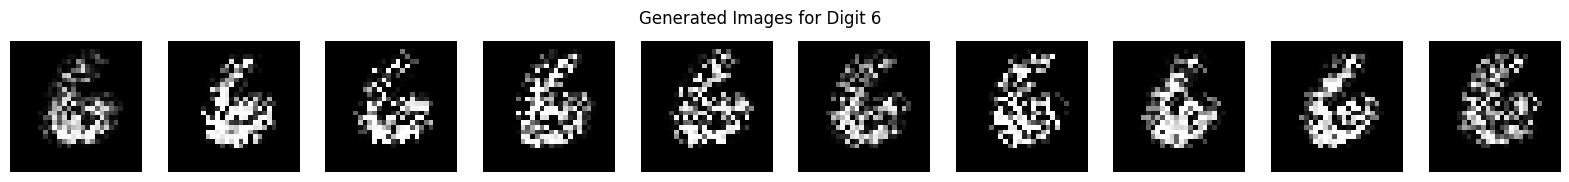

Epoch 2, MMD Loss: 0.026103615760803223


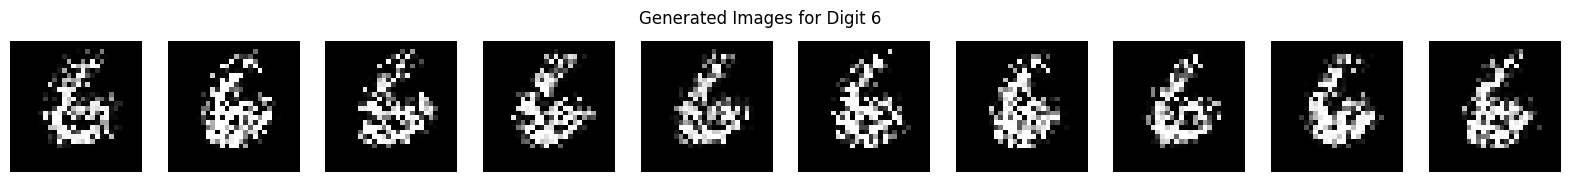

Epoch 3, MMD Loss: 0.027998924255371094


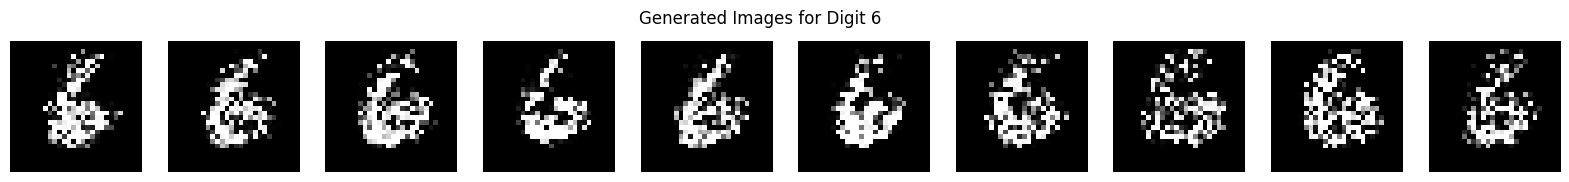

Epoch 4, MMD Loss: 0.02596724033355713


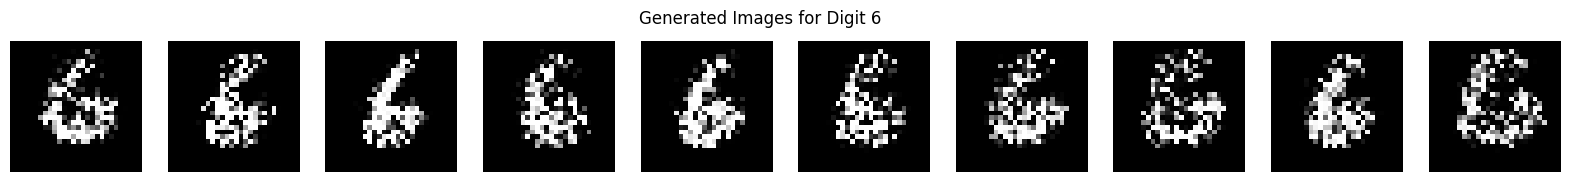

Epoch 5, MMD Loss: 0.025419235229492188


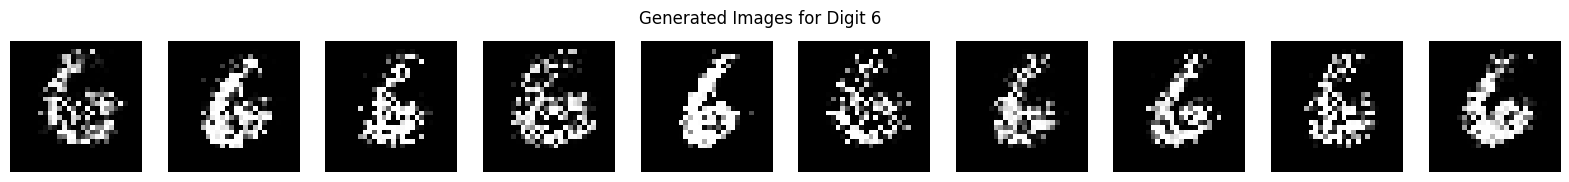

Epoch 6, MMD Loss: 0.025446295738220215


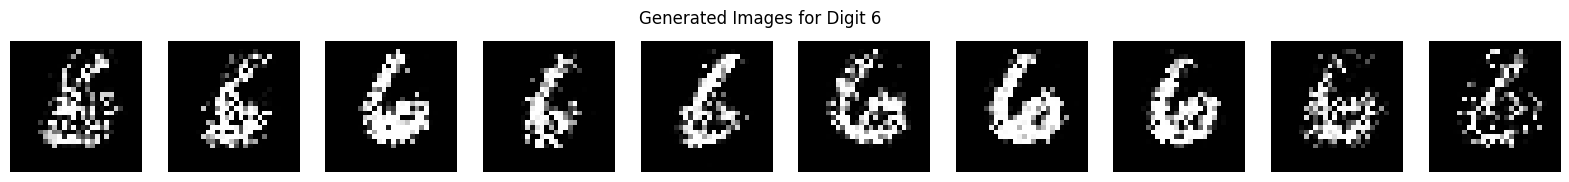

Epoch 7, MMD Loss: 0.027597784996032715


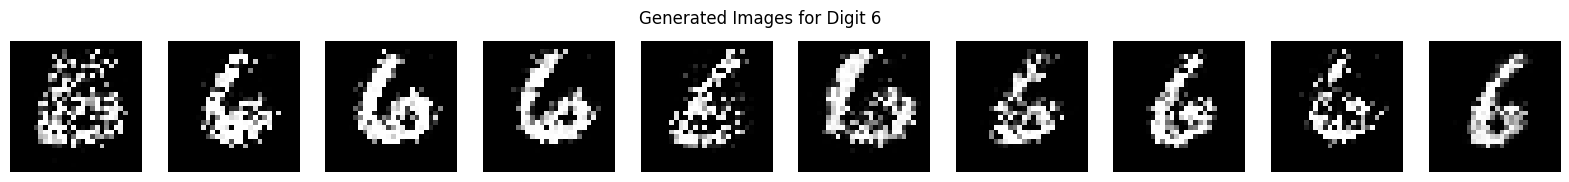

Epoch 8, MMD Loss: 0.026520967483520508


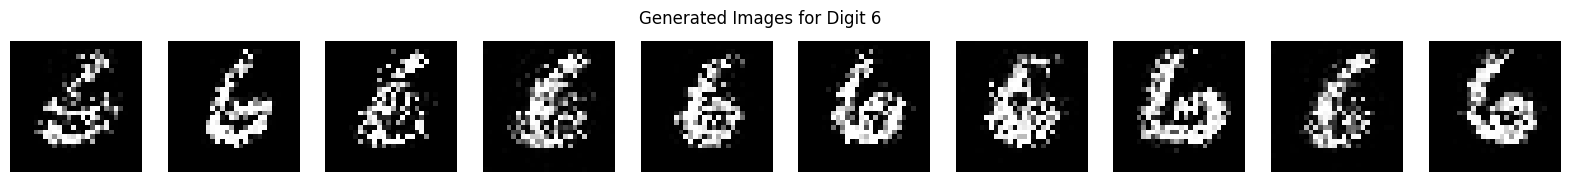

Epoch 9, MMD Loss: 0.0256655216217041


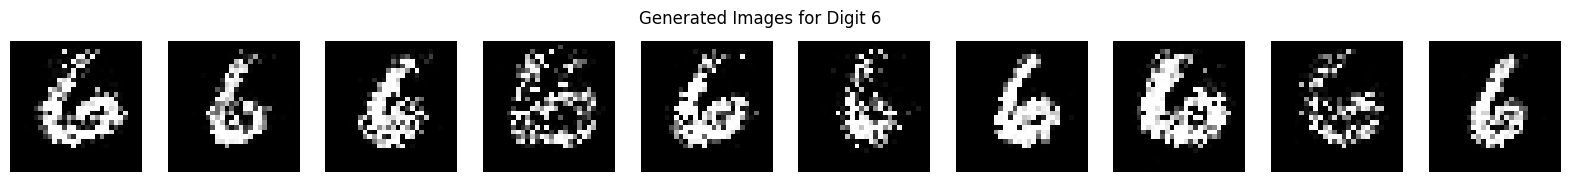

Epoch 10, MMD Loss: 0.024286985397338867


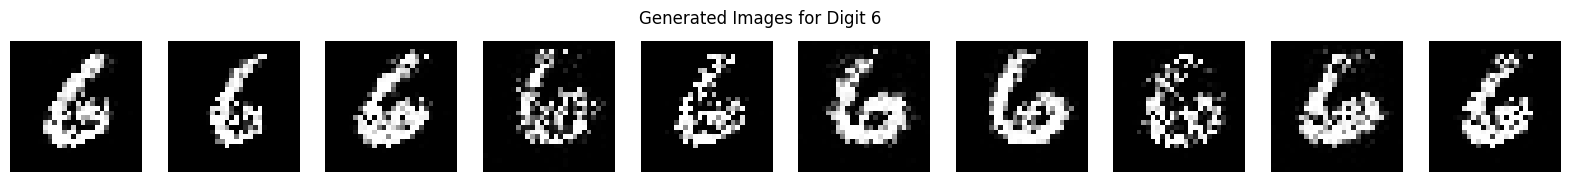

Training model for digit 7
Epoch 1, MMD Loss: 0.04515731334686279


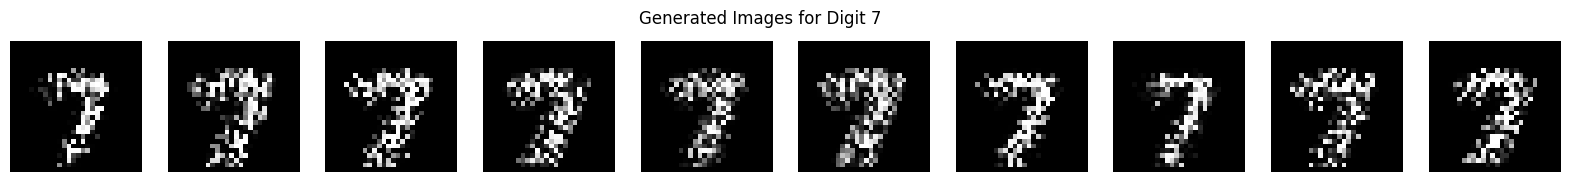

Epoch 2, MMD Loss: 0.0353318452835083


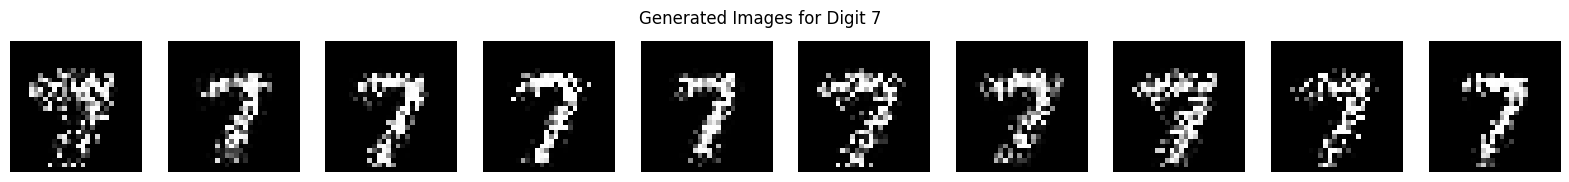

Epoch 3, MMD Loss: 0.03352761268615723


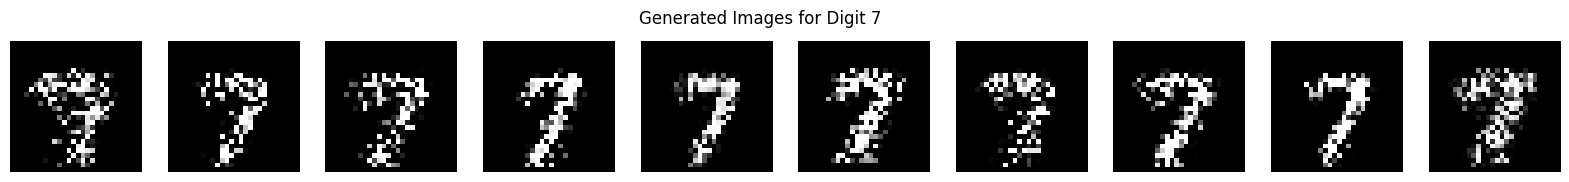

Epoch 4, MMD Loss: 0.03478741645812988


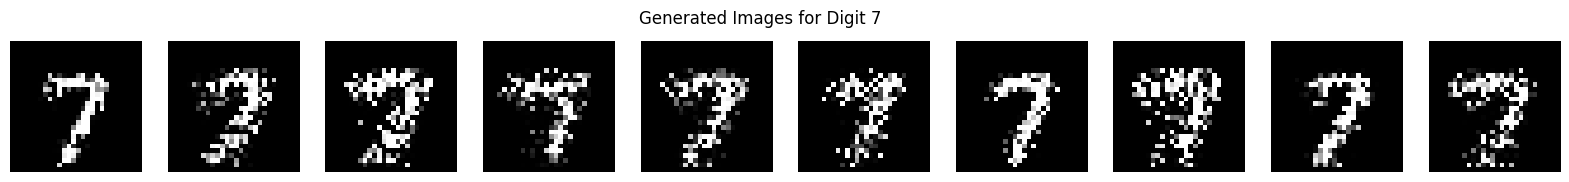

Epoch 5, MMD Loss: 0.03230905532836914


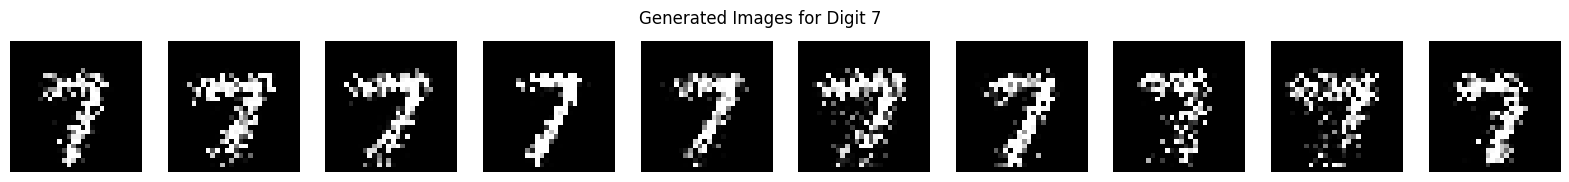

Epoch 6, MMD Loss: 0.03879272937774658


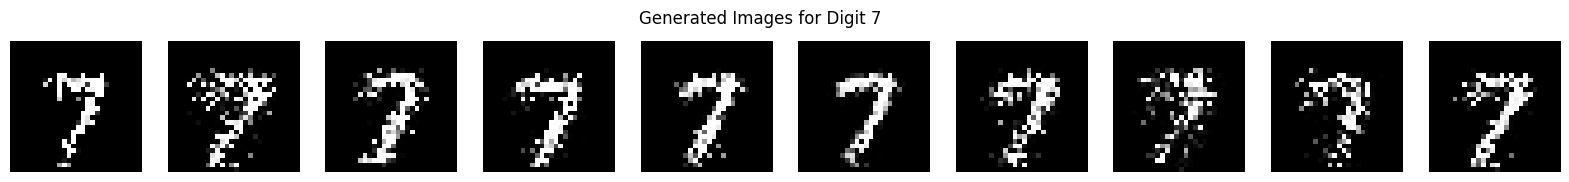

Epoch 7, MMD Loss: 0.03328549861907959


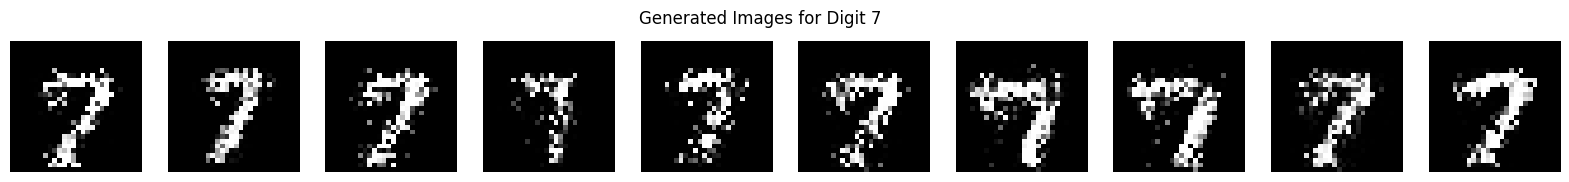

KeyboardInterrupt: 

In [81]:
# Assume GMMN and compute_mmd are defined as before

def train_model_for_digit(digit_dataset, i):
    model = models[i]
    optimizer = tf.keras.optimizers.legacy.Adam()

    epochs = 10  # You might adjust this based on experimentation
    for epoch in range(epochs):
        for real_images in digit_dataset:
            with tf.GradientTape() as tape:
                noise = tf.random.normal([real_images.shape[0], 100])  # 100-dimensional noise vector
                generated_images = model(noise)
                mmd_loss = compute_mmd(real_images, generated_images)
            
            gradients = tape.gradient(mmd_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        print(f'Epoch {epoch+1}, MMD Loss: {mmd_loss.numpy()}')
        generate_images(model, digit=i)
    return model

for i, dataset in enumerate(datasets):
    if i == 0 or i == 1: 
        continue
    print(f"Training model for digit {i}")
    model = train_model_for_digit(dataset, i)


In [ ]:
# Generate and display images for each digit
for i, model in enumerate(models):
    generate_images(model, digit=i)